In [1]:
import model
import torch
from dataset import FaceData

from torch.utils.data import DataLoader
from torchvision.utils import save_image
from tqdm import tqdm

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import torchvision.transforms as T

In [2]:
get_G = model.Generator()
get_G

Generator(
  (conv1): Conv2d(3, 64, kernel_size=(9, 9), stride=(1, 1), padding=(4, 4))
  (B_conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (B_bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (P_conv): Conv2d(64, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pix_shuffle): PixelShuffle(upscale_factor=2)
  (conv2): Conv2d(64, 3, kernel_size=(9, 9), stride=(1, 1), padding=(4, 4))
)

In [3]:
x = torch.randn(10, 3, 16, 16)
out_G = get_G.forward(x)

In [4]:
out_G.size()

torch.Size([10, 3, 128, 128])

In [5]:
get_D = model.Discriminator()
get_D

Discriminator(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (LReLU): LeakyReLU(negative_slope=0.2)
  (bn64): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv128s1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv128s2): Conv2d(128, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (bn128): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv256s1): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv256s2): Conv2d(256, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (bn256): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv512s1): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv512s2): Conv2d(512, 512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (bn512): BatchNorm

In [6]:
out_D = get_D.forward(out_G)

In [7]:
out_D.size()

torch.Size([10, 1])

# Face Data Load

In [8]:
batch_size = 8
dataset = FaceData('train')

In [9]:
data_loader = DataLoader(dataset, batch_size, shuffle=True, num_workers=0, pin_memory=True, drop_last=True)

In [10]:
x, y = iter(data_loader).next()

In [11]:
x.size()

torch.Size([8, 3, 32, 32])

In [12]:
y.size()

torch.Size([8, 3, 256, 256])

In [13]:
np

&lt;module &#39;numpy&#39; from &#39;C:\\Users\\ZLKHZON\\Anaconda3\\envs\\torch37\\lib\\site-packages\\numpy\\__init__.py&#39;&gt;

In [14]:
x.permute(0,2,3,1).shape

torch.Size([8, 32, 32, 3])

In [15]:
x.size()

torch.Size([8, 3, 32, 32])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


&lt;matplotlib.image.AxesImage at 0x1d3a61a7888&gt;

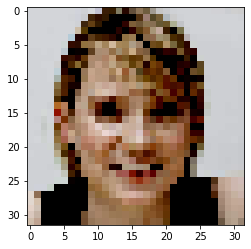

In [16]:
plt.imshow(x.permute(0,2,3,1)[0])

In [17]:
img = Image.open("./trainData/input/0.png").convert("RGB")

&lt;matplotlib.image.AxesImage at 0x1d3b3154a08&gt;

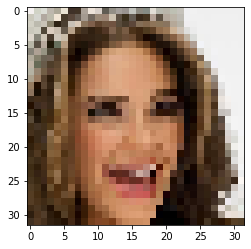

In [18]:
plt.imshow(np.array(img))

In [19]:
trans = T.Compose([
            T.ToTensor(),
            T.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
        ])

In [20]:
trans_img = trans(img)
print(trans_img.size())
print(trans_img)

torch.Size([3, 32, 32])
tensor([[[ 0.9216,  0.6392,  0.7176,  ...,  0.8745,  0.8745,  0.8745],
         [ 0.5922,  0.6706,  0.3882,  ...,  0.8824,  0.8824,  0.8745],
         [ 0.6471,  0.4745,  0.5765,  ...,  0.8824,  0.8824,  0.8824],
         ...,
         [-0.4902, -0.4118, -0.5294,  ...,  0.5059,  0.7098,  0.8196],
         [-0.6392, -0.4039, -0.3569,  ...,  0.8431,  0.8196,  0.8039],
         [-0.4902, -0.3490, -0.4588,  ..., -0.4824, -0.3176, -0.3647]],

        [[ 0.8902,  0.6549,  0.7255,  ...,  0.8745,  0.8745,  0.8745],
         [ 0.5765,  0.6784,  0.3176,  ...,  0.8824,  0.8824,  0.8745],
         [ 0.6314,  0.4588,  0.5294,  ...,  0.8824,  0.8824,  0.8824],
         ...,
         [-0.6549, -0.5765, -0.6627,  ...,  0.4588,  0.6784,  0.8588],
         [-0.7647, -0.6000, -0.5216,  ...,  0.7569,  0.7412,  0.7647],
         [-0.6157, -0.5451, -0.6235,  ..., -0.6941, -0.5059, -0.5216]],

        [[ 0.8824,  0.5529,  0.6627,  ...,  0.8745,  0.8745,  0.8745],
         [ 0.4745,  0

&lt;matplotlib.image.AxesImage at 0x1d3b3306748&gt;

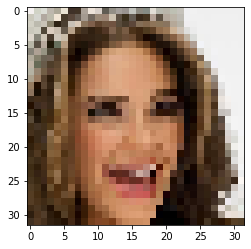

In [21]:
plt.imshow(np.ceil(np.transpose((trans_img/2+0.5).numpy(), (1,2,0))*255).astype(int))

&lt;matplotlib.image.AxesImage at 0x1d3ba4158c8&gt;

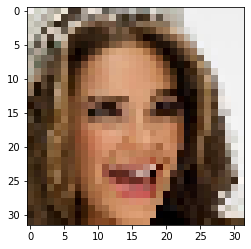

In [22]:
plt.imshow(np.transpose((trans_img/2+0.5).numpy(), (1,2,0)))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


&lt;matplotlib.image.AxesImage at 0x1d3ba487608&gt;

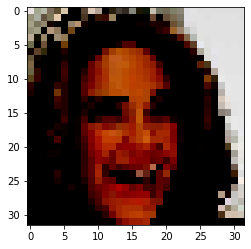

In [23]:
plt.imshow(trans_img.permute(1,2,0))

In [24]:
def denorm(x):
    out = (x + 1) / 2
    return out.clamp(0, 1)

In [25]:
denorm(trans(img))

tensor([[[0.9608, 0.8196, 0.8588,  ..., 0.9373, 0.9373, 0.9373],
         [0.7961, 0.8353, 0.6941,  ..., 0.9412, 0.9412, 0.9373],
         [0.8235, 0.7373, 0.7882,  ..., 0.9412, 0.9412, 0.9412],
         ...,
         [0.2549, 0.2941, 0.2353,  ..., 0.7529, 0.8549, 0.9098],
         [0.1804, 0.2980, 0.3216,  ..., 0.9216, 0.9098, 0.9020],
         [0.2549, 0.3255, 0.2706,  ..., 0.2588, 0.3412, 0.3176]],

        [[0.9451, 0.8275, 0.8627,  ..., 0.9373, 0.9373, 0.9373],
         [0.7882, 0.8392, 0.6588,  ..., 0.9412, 0.9412, 0.9373],
         [0.8157, 0.7294, 0.7647,  ..., 0.9412, 0.9412, 0.9412],
         ...,
         [0.1725, 0.2118, 0.1686,  ..., 0.7294, 0.8392, 0.9294],
         [0.1176, 0.2000, 0.2392,  ..., 0.8784, 0.8706, 0.8824],
         [0.1922, 0.2275, 0.1882,  ..., 0.1529, 0.2471, 0.2392]],

        [[0.9412, 0.7765, 0.8314,  ..., 0.9373, 0.9373, 0.9373],
         [0.7373, 0.8157, 0.6235,  ..., 0.9412, 0.9412, 0.9373],
         [0.7686, 0.6824, 0.7176,  ..., 0.9412, 0.9412, 0.

In [26]:
save_image(denorm(trans(img)), './sample.png')